# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#testing URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
city = "New York"
query_url = f"{url}appid={weather_api_key}&q={city}" 
response = requests.get(query_url)
responses = response.json()
pprint.pprint(responses)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 40.7143, 'lon': -74.006},
 'dt': 1691532603,
 'id': 5128581,
 'main': {'feels_like': 298.34,
          'humidity': 60,
          'pressure': 1003,
          'temp': 298.21,
          'temp_max': 299.42,
          'temp_min': 296.47},
 'name': 'New York',
 'sys': {'country': 'US',
         'id': 4610,
         'sunrise': 1691488752,
         'sunset': 1691539455,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'gust': 15.43, 'speed': 7.72}}


In [4]:
#TESTING Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_weather["dt"]# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qa'en
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | constantia
Processing Record 6 of Set 1 | shemysheyka
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | kabalo
Processing Record 9 of Set 1 | tamanrasset
Processing Record 10 of Set 1 | la ronge
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | dakhla
Processing Record 13 of Set 1 | kimbe
Processing Record 14 of Set 1 | aitape
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | ponta delgada
Processing Record 18 of Set 1 | marica
Processing Record 19 of Set 1 | arno
Processing Record 20 of Set 1 | kenai
Processing Record 21 of Set 1 | chonchi
Processing Record 22 of Set 1 | bardai
Processing Record 23 of Set 1 | kailua-kona
P

Processing Record 40 of Set 4 | remire-montjoly
Processing Record 41 of Set 4 | pangody
Processing Record 42 of Set 4 | dunedin
Processing Record 43 of Set 4 | lithgow
Processing Record 44 of Set 4 | puerto santa
Processing Record 45 of Set 4 | vikindu
Processing Record 46 of Set 4 | hilo
Processing Record 47 of Set 4 | wailua homesteads
Processing Record 48 of Set 4 | urucui
Processing Record 49 of Set 4 | guiuan
Processing Record 0 of Set 5 | eureka
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | ta`u
Processing Record 3 of Set 5 | puerto baquerizo moreno
Processing Record 4 of Set 5 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 5 of Set 5 | bikenibeu village
Processing Record 6 of Set 5 | mossendjo
Processing Record 7 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 8 of Set 5 | soe
Processing Record 9 of Set 5 | coahuayana de hidalgo
Processing Record 10 of Set 5 | nagqu
Processing Record 11 of Set 5 | natal
Processing Re

Processing Record 36 of Set 8 | gurh
Processing Record 37 of Set 8 | rabaul
Processing Record 38 of Set 8 | sandnessjoen
Processing Record 39 of Set 8 | poronaysk
Processing Record 40 of Set 8 | lorengau
Processing Record 41 of Set 8 | achit
Processing Record 42 of Set 8 | parauna
Processing Record 43 of Set 8 | sundumbili
Processing Record 44 of Set 8 | gallivare
City not found. Skipping...
Processing Record 45 of Set 8 | gedo
Processing Record 46 of Set 8 | oranjemund
Processing Record 47 of Set 8 | tchintabaraden
Processing Record 48 of Set 8 | lazaro cardenas
Processing Record 49 of Set 8 | ouro sogui
Processing Record 0 of Set 9 | arraial do cabo
Processing Record 1 of Set 9 | eregli
Processing Record 2 of Set 9 | la rinconada
Processing Record 3 of Set 9 | tynda
Processing Record 4 of Set 9 | holualoa
Processing Record 5 of Set 9 | masterton
Processing Record 6 of Set 9 | dolores
Processing Record 7 of Set 9 | along
Processing Record 8 of Set 9 | whangarei
Processing Record 9 of 

Processing Record 26 of Set 12 | yuscaran
Processing Record 27 of Set 12 | adolfo lopez mateos
Processing Record 28 of Set 12 | marsa alam
Processing Record 29 of Set 12 | metlili chaamba
Processing Record 30 of Set 12 | bandon
Processing Record 31 of Set 12 | kulia village
City not found. Skipping...
Processing Record 32 of Set 12 | trondheim
Processing Record 33 of Set 12 | eyl
Processing Record 34 of Set 12 | muang phonsavan
Processing Record 35 of Set 12 | lusaka
Processing Record 36 of Set 12 | andkhoy
Processing Record 37 of Set 12 | kotovo
Processing Record 38 of Set 12 | palikir - national government center
Processing Record 39 of Set 12 | balkanabat
Processing Record 40 of Set 12 | coventry
Processing Record 41 of Set 12 | mangrol
Processing Record 42 of Set 12 | rundu
Processing Record 43 of Set 12 | mpraeso
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qa'en,33.7265,59.1844,22.47,30,1,3.74,IR,1691533248
1,yellowknife,62.4560,-114.3525,22.29,40,20,7.72,CA,1691533214
2,iqaluit,63.7506,-68.5145,5.85,86,40,4.63,CA,1691532923
3,waitangi,-43.9535,-176.5597,9.34,92,100,0.89,NZ,1691532903
4,constantia,44.1833,28.6500,15.39,66,46,3.79,RO,1691532935


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qa'en,33.7265,59.1844,22.47,30,1,3.74,IR,1691533248
1,yellowknife,62.4560,-114.3525,22.29,40,20,7.72,CA,1691533214
2,iqaluit,63.7506,-68.5145,5.85,86,40,4.63,CA,1691532923
3,waitangi,-43.9535,-176.5597,9.34,92,100,0.89,NZ,1691532903
4,constantia,44.1833,28.6500,15.39,66,46,3.79,RO,1691532935


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

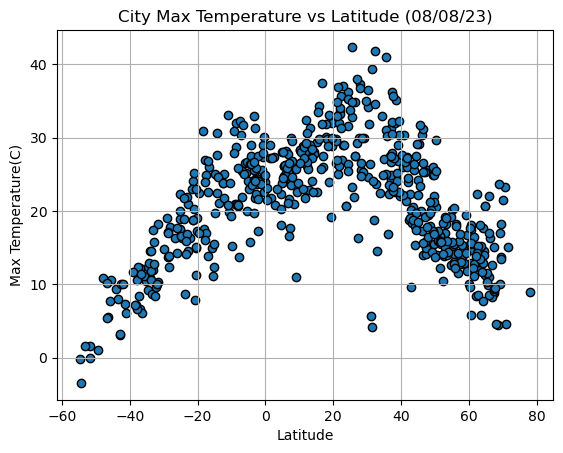

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

x = city_data_df['Lat']
y = city_data_df['Max Temp']

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x, y, edgecolor='black', label="Cities")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
#https://www.tutorialspoint.com/python/time_strftime.htm
plt.title(f"City Max Temperature vs Latitude ({time.strftime('%x')})") 
plt.grid()
fig1a = plt.gcf()
plt.show()
# Save the figure
fig1a.savefig("output_data/Fig1a.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

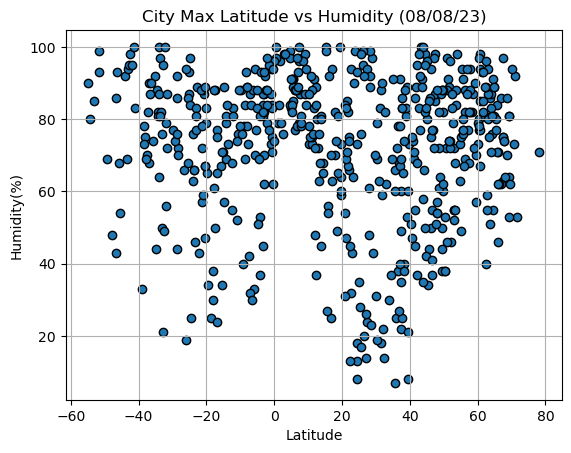

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x = city_data_df['Lat']
b = city_data_df['Humidity']

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x,b, edgecolor='black')
plt.title(f"City Max Latitude vs Humidity ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
fig2a = plt.gcf()
plt.show()

# Save the figure
fig2a.savefig("output_data/Fig2a.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

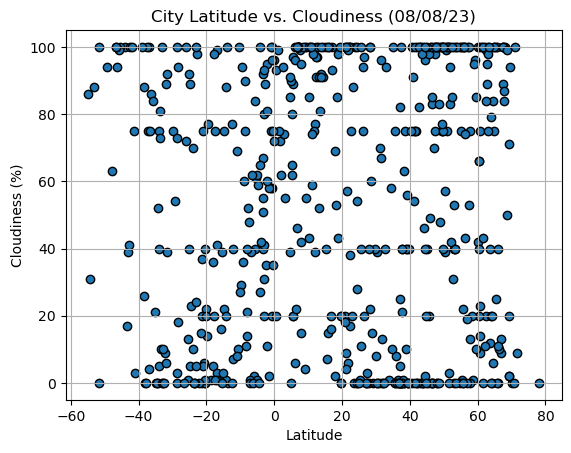

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x = city_data_df['Lat']
c = city_data_df['Cloudiness']

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x,c, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.grid()
fig3a=plt.gcf()
plt.show()
# Save the figure
fig3a.savefig("output_data/Fig3a.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

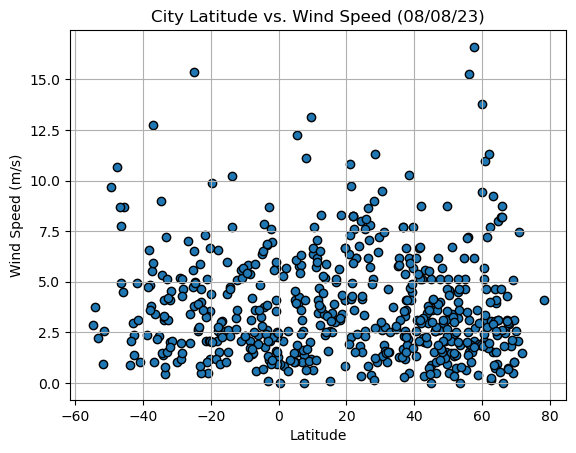

In [14]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x = city_data_df['Lat']
w = city_data_df['Wind Speed']

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x,w, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.grid()
fig4a=plt.gcf()
plt.show()
# Save the figure
fig4a.savefig("output_data/Fig4a.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#slope, int, r, p, std_err = st.linregress(x, y)

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qa'en,33.7265,59.1844,22.47,30,1,3.74,IR,1691533248
1,yellowknife,62.4560,-114.3525,22.29,40,20,7.72,CA,1691533214
2,iqaluit,63.7506,-68.5145,5.85,86,40,4.63,CA,1691532923
4,constantia,44.1833,28.6500,15.39,66,46,3.79,RO,1691532935
5,shemysheyka,52.8920,45.3928,19.24,52,0,3.23,RU,1691533248


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,9.34,92,100,0.89,NZ,1691532903
6,blackmans bay,-43.0167,147.3167,3.07,94,39,2.98,AU,1691532905
7,kabalo,-6.0500,26.9167,26.59,33,2,2.36,CD,1691533249
12,kimbe,-5.5502,150.1429,26.61,70,84,4.83,PG,1691533249
13,aitape,-3.1374,142.3475,25.43,87,31,2.13,PG,1691533249


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.41502834025962837


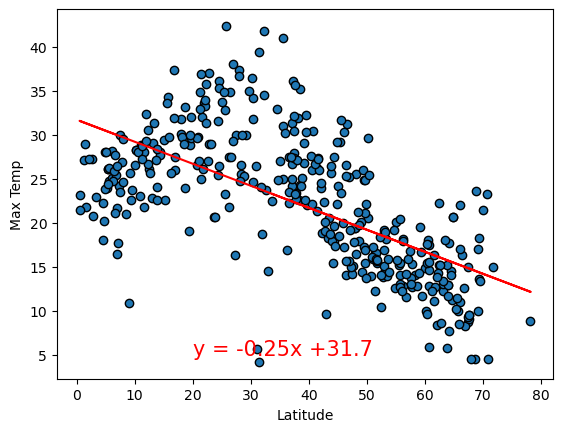

In [18]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, std_err = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.plot(x_values,fit,"r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.7244534596506279


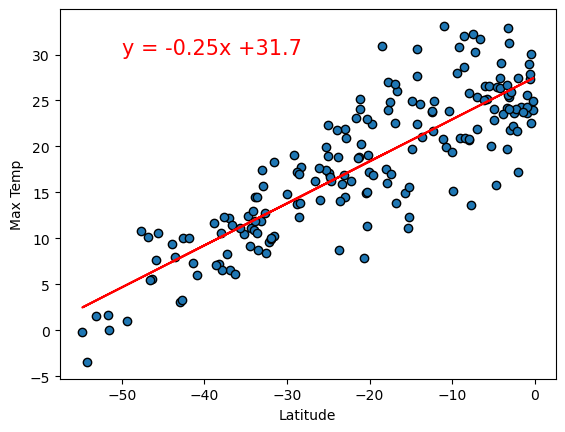

In [19]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, std_err = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.plot(x_values,fit,"r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** The max temperature shows significant linear relationship with latitude in norther and even more significant linear relationship in southern hemisphere. As Latitudes get closer to zero (Equator), max temperature significantly increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0005472507148630591


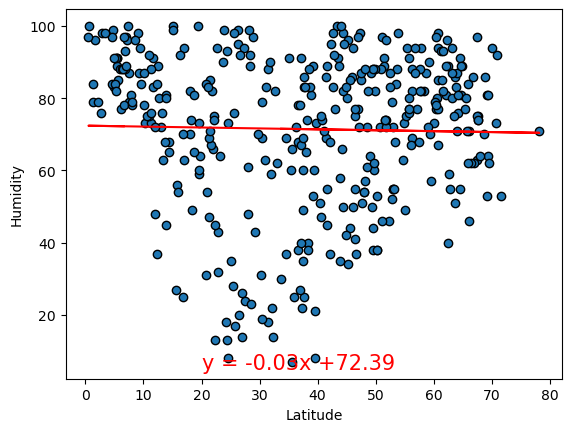

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, std_err = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.plot(x_values,fit,"r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.0018755510323307605


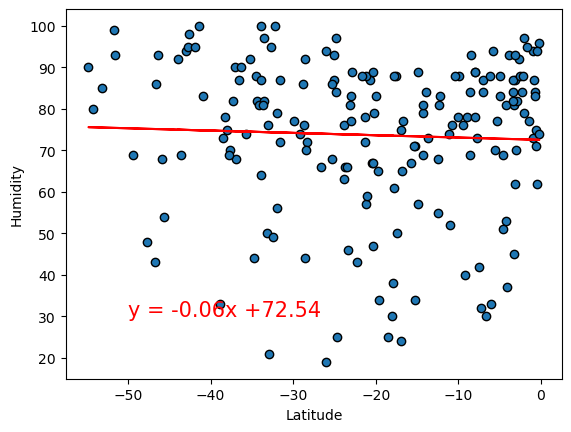

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, std_err = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.plot(x_values,fit,"r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Humidity vs. Latitude scatter plots with linear regression above shows that there is no significant change in humidity levels vs latitude in northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.010131823447760754


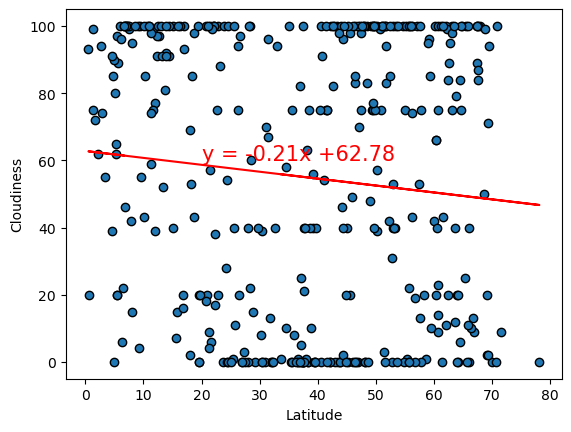

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, std_err = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.plot(x_values,fit,"r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.006012822824496168


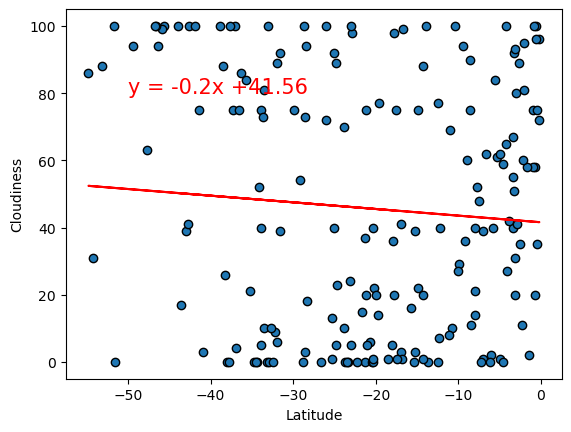

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
xs_values = southern_hemi_df["Lat"]
ys_values = southern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, std_err = stats.linregress(xs_values, ys_values)
fit = slope * xs_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(xs_values, ys_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.plot(xs_values,fit,"r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** The cloudiness has no significant relationship to the latitude for northern or southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007777737077769816


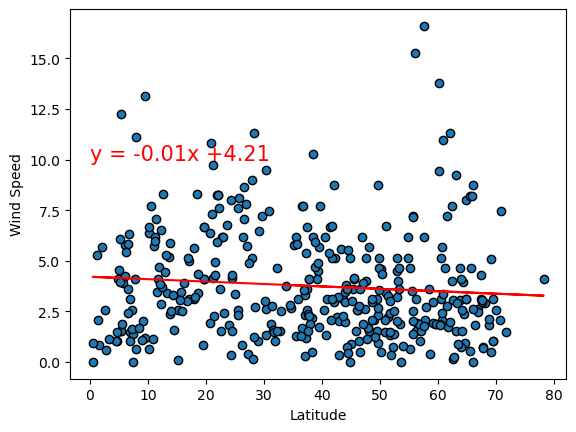

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, std_err = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(x_values,fit,"r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.006012822824496168


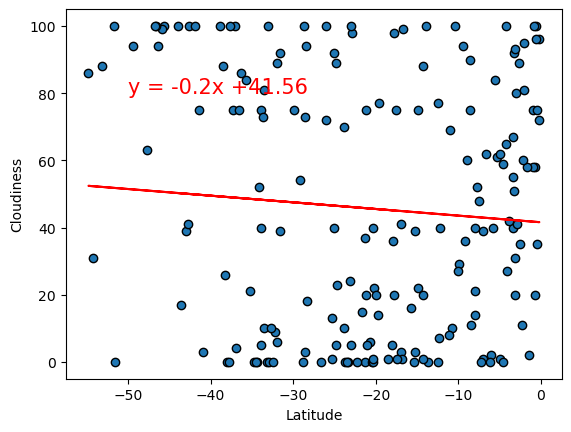

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
xs_values = southern_hemi_df["Lat"]
ys_values = southern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, std_err = stats.linregress(xs_values, ys_values)
fit = slope * xs_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(xs_values, ys_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.plot(xs_values,fit,"r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

In [26]:
**Discussion about the linear relationship:** Wind Speed vs. Latitude scatter plot and linear regression above shows that the wind speed has no significant relationship to the latitude for northern or southern hemisphere.

SyntaxError: invalid syntax (343589153.py, line 1)